In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving AirPassengers.csv to AirPassengers.csv


In [2]:
df = pd.read_csv("/content/AirPassengers.csv")
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
df.count()

,0
Month,144
#Passengers,144


In [5]:
df['Month']=pd.to_datetime(df['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [6]:
df.set_index('Month',inplace=True)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


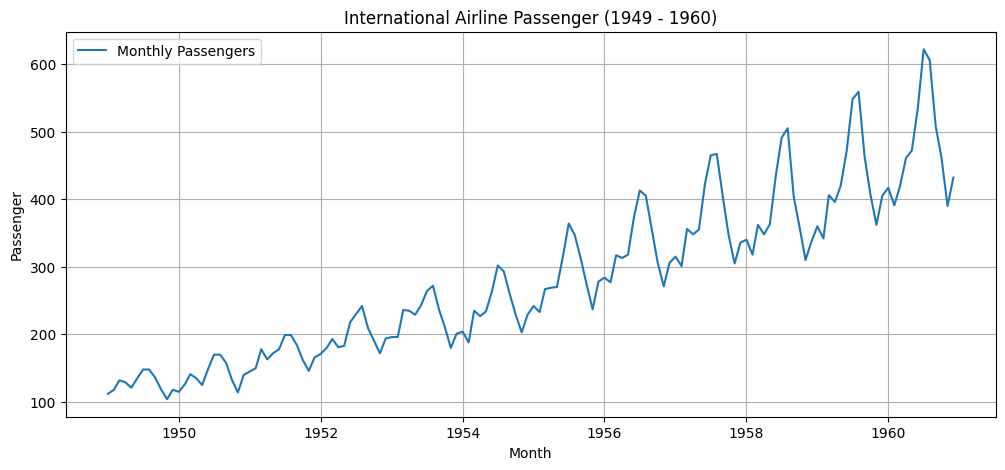

In [8]:
plt.figure(figsize=(12,5))
plt.plot(df,label='Monthly Passengers')
plt.title('International Airline Passenger (1949 - 1960)')
plt.xlabel('Month')
plt.ylabel('Passenger')
plt.legend()
plt.grid(True)
plt.show()

In [77]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df[['#Passengers']])


In [78]:
def create_sequences(data,sequence_length):
  X = []
  Y =[]
  for i in range(sequence_length, len(data)):
    X.append(data[i-sequence_length:i, 0])
    Y.append(data[i, 0])
  return np.array(X),np.array(Y)


In [79]:
sequence_length = 12
X,Y = create_sequences(scaled_data, sequence_length)

In [80]:
X = X.reshape(X.shape[0],X.shape[1],1)

In [81]:
train_size = int(len(X)*0.8)
X_train, X_test = X[:train_size], X[train_size:]
Y_train, Y_test = Y[:train_size], Y[train_size:]

In [82]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [83]:
model = Sequential()
model.add(LSTM(units=50, return_sequences =  False, input_shape = (X_train.shape[1],1)))
model.add(Dense(units=1))
model.compile(optimizer ='adam',loss = 'mean_squared_error')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_11 (LSTM)                  │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

In [84]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor = 'val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, Y_train,
    epochs=100,
    batch_size=16,
    validation_data=(X_test,Y_test),
    callbacks=[early_stopping],
    verbose=1
)

print("Training Loss:", history.history['loss'][-1])
print("Validation Loss:", history.history['val_loss'][-1])
print("Best Validation Loss:", min(history.history['val_loss']))
print("Best Epoch:", np.argmin(history.history['val_loss']))

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 0.0927 - val_loss: 0.1584
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0198 - val_loss: 0.0245
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0139 - val_loss: 0.0222
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0141 - val_loss: 0.0323
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0081 - val_loss: 0.0380
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0076 - val_loss: 0.0292
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0069 - val_loss: 0.0222
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0084 - val_loss: 0.0221
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0074 - val_loss: 0.0224
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0069 - val_loss: 0.0222
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0063 - val_loss: 0.0221
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0060 - val_lo

In [85]:
predict = model.predict(X_test)

predict_passengers = scaler.inverse_transform(predict.reshape(-1,1))
actual_passengers = scaler.inverse_transform(Y_test.reshape(-1,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


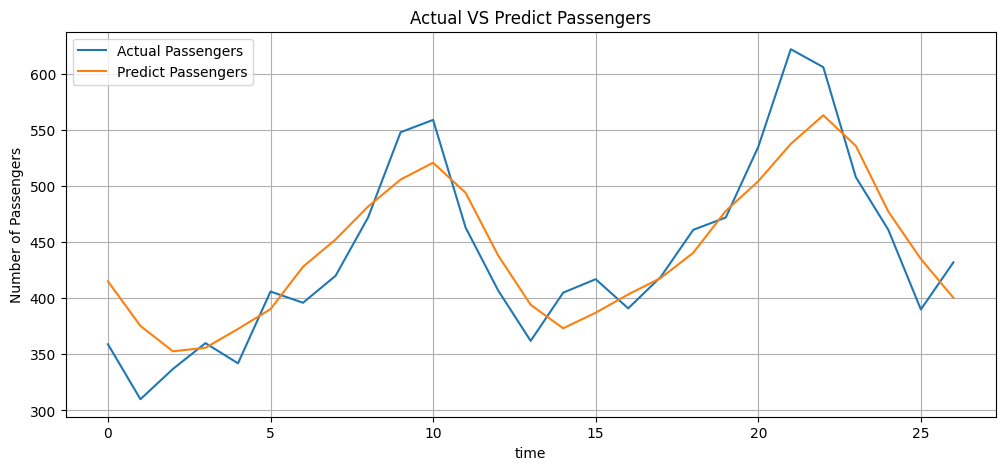

In [86]:
plt.figure(figsize=(12,5))
plt.plot(actual_passengers, label='Actual Passengers')
plt.plot(predict_passengers,label='Predict Passengers')
plt.title("Actual VS Predict Passengers")
plt.xlabel("time")
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

In [87]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(actual_passengers, predict_passengers)
mse = mean_squared_error(actual_passengers, predict_passengers)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 30.24
Mean Squared Error (MSE): 1248.94
Root Mean Squared Error (RMSE): 35.34
